<a href="https://colab.research.google.com/github/mcatrinque/area_cep_mg/blob/main/br_mg_ceps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Representação Geométrica das Áreas de CEP do Estado de Minas Gerais

##Adicionando Bibliotecas

In [1]:
!pip install geopandas
from google.colab import files
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyproj
import missingno as msno
import seaborn as sns
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Importando Base de Dados

As bases foram obtidos em [OpenAddresses](https://batch.openaddresses.io/data) e os seus limites territoriais coletados de [Portal de Mapas - IBGE](https://portaldemapas.ibge.gov.br/portal.php). Já as referências de residências e comércios da capital mineira, foram coletadas do sistema [BHMAP - PBH](http://bhmap.pbh.gov.br/v2/mapa/idebhgeo), fornecido pela Prefeitura de Belo Horizonte. 

Carregando tabelas com os registros de unidades residenciais e comerciais referentes a Belo Horizonte e Minas Gerais

In [2]:
path = '/content/'
!gdown "1ggh_PcHpAYUz-z1GNlKUG1SYKWS5OKh5"
!gdown "1PNr1UECAIGAbuRA9hn3BYwiSy3WHIa5p"

Downloading...
From: https://drive.google.com/uc?id=1ggh_PcHpAYUz-z1GNlKUG1SYKWS5OKh5
To: /content/unidades
100% 1.13G/1.13G [00:04<00:00, 254MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PNr1UECAIGAbuRA9hn3BYwiSy3WHIa5p
To: /content/unidades_bh
100% 95.0M/95.0M [00:00<00:00, 154MB/s]


### Unidades Residenciais e Comerciais - Minas Gerais

In [3]:
unidades_mg = pd.read_csv('unidades', sep=';', )
unidades_mg.drop('unit', axis=1, inplace=True)
unidades_mg.drop('district', axis=1, inplace=True)
unidades_mg.drop('cod_unidade', axis=1, inplace=True)
unidades_mg.drop('id', axis=1, inplace=True)
unidades_mg.rename(columns={'number':'Numero', 'street': 'Rua', 'city':'Cidade', 'region':'UF', 'postcode':'CEP'}, inplace=True)
unidades_mg.head()

,distancia,ogc_fid,hash,Numero,Rua,Cidade,UF,CEP,wkb_geometry
0,0.132457,1,241967d28ddd6943,375,AVENIDA JOSE ESTEVES BORGES,Abadia dos Dourados,MG,38540-000,010100002042120000FA83DCA051B347C04EB6813B507D...
1,0.132457,2,fdb87216b827362d,241,AVENIDA JOSE ESTEVES BORGES,Abadia dos Dourados,MG,38540-000,010100002042120000FA83DCA051B347C04EB6813B507D...
2,0.132457,3,b00de4ecf671ccb2,225,AVENIDA JOSE ESTEVES BORGES,Abadia dos Dourados,MG,38540-000,010100002042120000FA83DCA051B347C04EB6813B507D...
3,0.132457,4,ea24966be48ddaf1,219,AVENIDA JOSE ESTEVES BORGES,Abadia dos Dourados,MG,38540-000,010100002042120000FA83DCA051B347C04EB6813B507D...
4,0.134399,6,bdc9aa2327a071ca,20,RUA JOSE TOMAZ DA CUNHA,Abadia dos Dourados,MG,38540-000,010100002042120000F9A46EC218B347C0D9092FC1A97D...


### Unidades Residenciais e Comerciais - Belo Horizonte

In [4]:
unidades_bh = pd.read_csv('unidades_bh', sep=';')
unidades_bh.rename(columns={'number':'Numero', 'street': 'Rua', 'unit':'Unidade', 'postcode':'CEP'}, inplace=True)
unidades_bh.head()

,Rua,Numero,Unidade,CEP,hash,ogc_fid,distancia,wkb_geometry
0,AVENIDA AFONSO PENA,3031,APARTAMENTO 51,30130-008,aed2de0f4bb1b626,533112,0.004529,0101000020421200004628B682A6F645C05E8C37E801F0...
1,AVENIDA AFONSO PENA,3031,APARTAMENTO 52,30130-008,29eaf1ffa950d168,533113,0.004529,0101000020421200004628B682A6F645C05E8C37E801F0...
2,AVENIDA AFONSO PENA,3031,APARTAMENTO 41,30130-008,b8c4078e882931ed,533114,0.004529,0101000020421200004628B682A6F645C05E8C37E801F0...
3,AVENIDA AFONSO PENA,3031,APARTAMENTO 42,30130-008,9d0fc28ad8dd4f1e,533115,0.004529,0101000020421200004628B682A6F645C05E8C37E801F0...
4,AVENIDA AFONSO PENA,3031,APARTAMENTO 31,30130-008,2a0d2e9888b185e2,533116,0.004529,0101000020421200004628B682A6F645C05E8C37E801F0...


## Análises e Observações das Bases de Dados

### Análise da base de dados de Minas Gerais

Verificando os Tipos de dados da base

In [5]:
unidades_mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6741881 entries, 0 to 6741880
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   distancia     float64
 1   ogc_fid       int64  
 2   hash          object 
 3   Numero        object 
 4   Rua           object 
 5   Cidade        object 
 6   UF            object 
 7   CEP           object 
 8   wkb_geometry  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 462.9+ MB


Avaliando atributos de acordo com a quantidade de registros vazios 

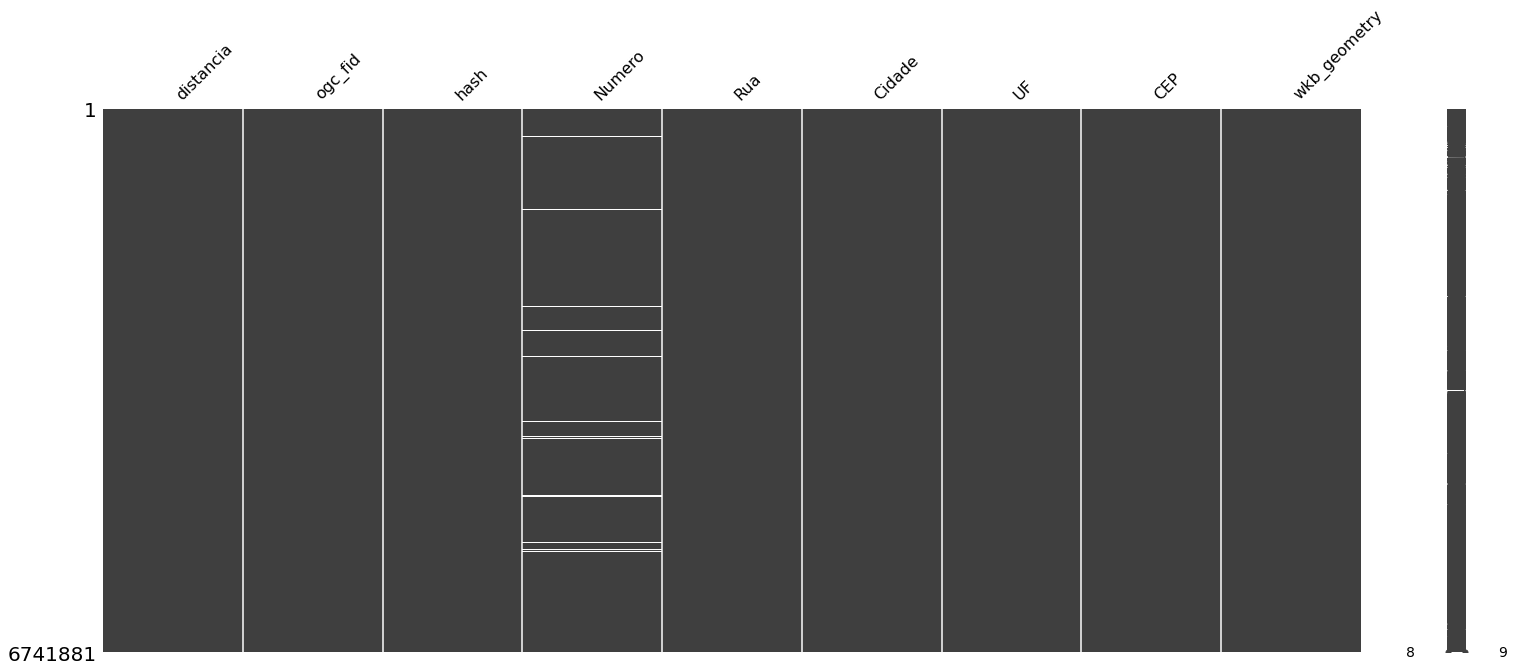

In [6]:
msno.matrix(unidades_mg)

### Análise da base de dados de Belo Horizonte

Verificando os Tipos de dados da base

In [7]:
unidades_bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676408 entries, 0 to 676407
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Rua           676408 non-null  object 
 1   Numero        676125 non-null  object 
 2   Unidade       387097 non-null  object 
 3   CEP           676408 non-null  object 
 4   hash          676408 non-null  object 
 5   ogc_fid       676408 non-null  int64  
 6   distancia     676408 non-null  float64
 7   wkb_geometry  676408 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 41.3+ MB


Avaliando atributos de acordo com a quantidade de registros vazios 

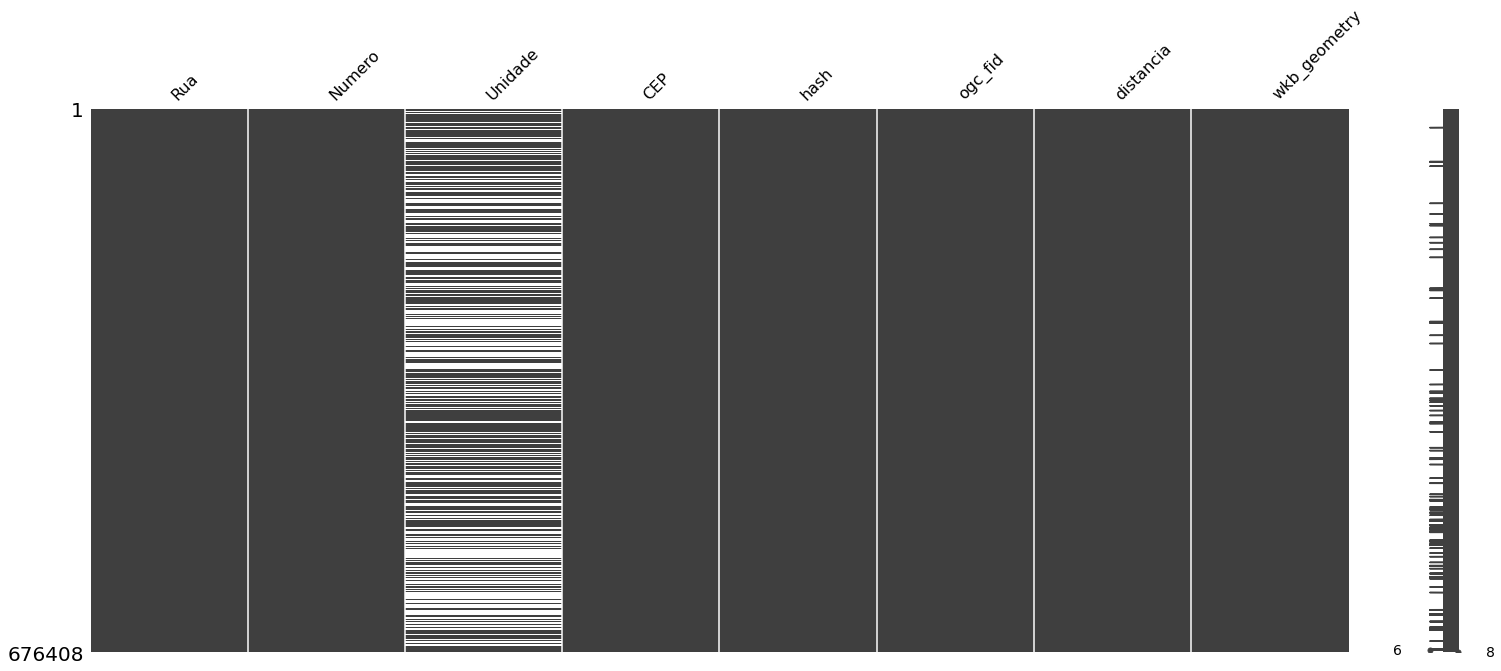

In [8]:
msno.matrix(unidades_bh)

##Definições de Área Extraídas das Bases Anteriores

######Representação das Áreas de CEP - Minas Gerais

In [9]:
!gdown "1wzhm433XVQjMNXfykrIVx1SRvgJKIzEd"
!gdown "1YXx2oIixYeMZoeOiE8CXCwXUjiHrIJOb"
!gdown "1NxNR_yQ7IdzUnPq4Whkr8O-nhmiDuA1-"
!gdown "1nrnyH7o1MA7FTbKetIY8qgPDz_etZrXE"

Downloading...
From: https://drive.google.com/uc?id=1wzhm433XVQjMNXfykrIVx1SRvgJKIzEd
To: /content/br_mg_poligonos_ceps.shp
100% 34.9M/34.9M [00:00<00:00, 187MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YXx2oIixYeMZoeOiE8CXCwXUjiHrIJOb
To: /content/br_mg_poligonos_ceps.dbf
100% 778k/778k [00:00<00:00, 109MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NxNR_yQ7IdzUnPq4Whkr8O-nhmiDuA1-
To: /content/br_mg_poligonos_ceps.shx
100% 311k/311k [00:00<00:00, 101MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nrnyH7o1MA7FTbKetIY8qgPDz_etZrXE
To: /content/br_mg_poligonos_ceps.prj
100% 151/151 [00:00<00:00, 186kB/s]


###Limites dos Municipios MG

In [10]:
!gdown "10etKZd9KUV47m_wm9EnqsFGXLp0Lc2dv"
!gdown "1WExkYI1i6JrUw_sMkx2hGqzNwgz5wdsL"
!gdown "1O1Gja2X7CcbUQeuMp3Qa3yVlgRVXoD9O"
!gdown "18Do2b9uuY3MON8Z7ace_wF0erEIB7kUH"

Downloading...
From: https://drive.google.com/uc?id=10etKZd9KUV47m_wm9EnqsFGXLp0Lc2dv
To: /content/br_mg_limites_municipios.dbf
100% 207k/207k [00:00<00:00, 87.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WExkYI1i6JrUw_sMkx2hGqzNwgz5wdsL
To: /content/br_mg_limites_municipios.shp
100% 48.5M/48.5M [00:00<00:00, 183MB/s]
Downloading...
From: https://drive.google.com/uc?id=1O1Gja2X7CcbUQeuMp3Qa3yVlgRVXoD9O
To: /content/br_mg_limites_municipios.shx
100% 6.92k/6.92k [00:00<00:00, 5.54MB/s]
Downloading...
From: https://drive.google.com/uc?id=18Do2b9uuY3MON8Z7ace_wF0erEIB7kUH
To: /content/br_mg_limites_municipios.prj
100% 151/151 [00:00<00:00, 241kB/s]


###Representação das Áreas de CEP - Belo Horizonte

In [11]:
!gdown "1aqnDkgEKC45QmovK0Hk1costnSYSuPsS"
!gdown "1C1iKbh06HTI8sLcYxBgjuwmoohtTfiFe"
!gdown "1WP-myPEeiCz6-tTaViMpXEafW4txIs0X"
!gdown "1pr3eUz86nt_0ysECgxBDqXjR8u-jrrbp"

Downloading...
From: https://drive.google.com/uc?id=1aqnDkgEKC45QmovK0Hk1costnSYSuPsS
To: /content/br_mg_bh_poligonos_ceps.prj
100% 151/151 [00:00<00:00, 236kB/s]
Downloading...
From: https://drive.google.com/uc?id=1C1iKbh06HTI8sLcYxBgjuwmoohtTfiFe
To: /content/br_mg_bh_poligonos_ceps.dbf
100% 287k/287k [00:00<00:00, 99.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WP-myPEeiCz6-tTaViMpXEafW4txIs0X
To: /content/br_mg_bh_poligonos_ceps.shx
100% 115k/115k [00:00<00:00, 69.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pr3eUz86nt_0ysECgxBDqXjR8u-jrrbp
To: /content/br_mg_bh_poligonos_ceps.shp
100% 6.55M/6.55M [00:00<00:00, 237MB/s]


###Limites Regionais Belo Horizonte

In [12]:
!gdown "1F2-9jbpOPKttjh552O769EzMsqD7P1Ve"
!gdown "1km-XOlaonfsGmmkZqoyTCxgmW-ToqlgL"
!gdown "1splo5MNUf1vltEOESZOoi3CO1rdfu-sH"
!gdown "1sr1VLaEcbJ3OO-KNW2JeGXqwGWJ6bcE0"

Downloading...
From: https://drive.google.com/uc?id=1F2-9jbpOPKttjh552O769EzMsqD7P1Ve
To: /content/br_mg_bh_limites_regionais.shp
100% 411k/411k [00:00<00:00, 95.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1km-XOlaonfsGmmkZqoyTCxgmW-ToqlgL
To: /content/br_mg_bh_limites_regionais.shx
100% 108/108 [00:00<00:00, 173kB/s]
Downloading...
From: https://drive.google.com/uc?id=1splo5MNUf1vltEOESZOoi3CO1rdfu-sH
To: /content/br_mg_bh_limites_regionais.dbf
100% 229/229 [00:00<00:00, 335kB/s]
Downloading...
From: https://drive.google.com/uc?id=1sr1VLaEcbJ3OO-KNW2JeGXqwGWJ6bcE0
To: /content/br_mg_bh_limites_regionais.prj
100% 796/796 [00:00<00:00, 1.24MB/s]


## Coleta e Tratamento de Dados
Os shapefiles foram gerado a partir do agrupamento de unidades, residenciais e comerciais, em função do cep e da distância dos pontos de cada *cluster* para o seu centróide, e da junção com os CEPs cuja a área corresponde ao território do municpios. Os pontos georeferenciados do estado de Minas Gerais e de Belo Horizonte foram obtidos a partir das bases de dados importadas. A partir dos pontos fornecidos pela base e tratados pelo processo descrito, foi possível estimar um envoltório convexo que determina-se os limites de área dos CEPs que não eram equivalente a área do município.

### Agrupando as unidades por CEP e Cidade

###Dados Relacionados as Áreas de CEP - Minas Gerais

In [13]:
# project GeoPandas dataframe
mg_area_cep = gpd.read_file(path + 'br_mg_poligonos_ceps.shp')
mg_area_cep.drop('id', axis=1, inplace=True)
mg_area_cep.to_crs(pyproj.CRS.from_epsg(4674), inplace=True)
mg_area_cep.rename(columns={'postcode':'CEP', 'city':'Cidade'}, inplace=True)
#Generate coordenates to plot 
#mg_area_cep['Coordenadas'] = mg_area_cep['geometry'].centroid


In [14]:
#Join units by postcode and count. After this, merging result into postcode geometry dataframes
mg_area_cep = pd.merge(unidades_mg.groupby(['CEP', 'Cidade']).size().rename('QTD_Unidades').reset_index(), mg_area_cep, on=['CEP'], how='left')
mg_area_cep = mg_area_cep.dropna()
#Fit count colunmn to nunmeric type
mg_area_cep['QTD_Unidades'] = pd.to_numeric(mg_area_cep['QTD_Unidades'])
#Transform merged DataFrame into a GeoDataFrame
mg_area_cep = gpd.GeoDataFrame(mg_area_cep, geometry='geometry')
mg_area_cep.head()

,CEP,Cidade,QTD_Unidades,geometry
0,30107-970,Belo Horizonte,74,"POLYGON ((-43.93719 -19.82030, -43.93913 -19.8..."
3,30110-012,Belo Horizonte,24,"POLYGON ((-43.92042 -19.92249, -43.92463 -19.9..."
4,30110-013,Belo Horizonte,36,"POLYGON ((-43.91919 -19.92237, -43.91999 -19.9..."
5,30110-017,Belo Horizonte,72,"POLYGON ((-43.92015 -19.92776, -43.91997 -19.9..."
6,30110-018,Belo Horizonte,22,"POLYGON ((-43.92038 -19.92731, -43.92059 -19.9..."


In [15]:
mg_area_cep.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 29990 entries, 0 to 31702
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CEP           29990 non-null  object  
 1   Cidade        29990 non-null  object  
 2   QTD_Unidades  29990 non-null  int64   
 3   geometry      29990 non-null  geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 1.1+ MB


###Estatísticas relacionadas à quantidade de unidades associadas a cada CEP de Minas Gerais:

In [16]:
mg_area_cep.describe()

,QTD_Unidades
count,29990.000000
mean,222.526709
std,1260.795504
min,3.000000
25%,32.000000
50%,59.000000
75%,109.000000
max,46309.000000


###Visualização da distribuição das unidades por CEP em Belo Horizonte

In [17]:
#You can see the distribution of residential and commercial units
px.violin(
    mg_area_cep,
    x = "QTD_Unidades",
    #draw box plot inside violin
    box = True,
    #draw all individual points 
    points = "all" 
)

###Dados Relacionados as Áreas de CEP - Belo Horizonte

In [18]:
# project GeoPandas dataframe
bh_area_cep = gpd.read_file(path + 'br_mg_bh_poligonos_ceps.shp')
bh_area_cep.to_crs(pyproj.CRS.from_epsg(4674), inplace=True)
bh_area_cep.drop('id', axis=1, inplace=True)
bh_area_cep.rename(columns={'cep':'CEP'}, inplace=True)

In [19]:
bh_area_cep = pd.merge(unidades_bh.groupby(['CEP']).size().rename('QTD_Unidades').reset_index(), bh_area_cep, on=['CEP'], how='right')
#Fit count colunmn to nunmeric type
bh_area_cep['QTD_Unidades'] = pd.to_numeric(bh_area_cep['QTD_Unidades'])
#Transform merged DataFrame into a GeoDataFrame
bh_area_cep = gpd.GeoDataFrame(bh_area_cep, geometry='geometry')
bh_area_cep.head()

,CEP,QTD_Unidades,geometry
0,31744-134,NaN,"POLYGON ((-43.94817 -19.82529, -43.94838 -19.8..."
1,31748-550,NaN,"POLYGON ((-43.92594 -19.80153, -43.92602 -19.8..."
2,30860-280,NaN,"POLYGON ((-44.00601 -19.91061, -44.00584 -19.9..."
3,30260-090,NaN,"POLYGON ((-43.91679 -19.92123, -43.91687 -19.9..."
4,31130-230,69.0,"POLYGON ((-43.94960 -19.88662, -43.94983 -19.8..."


In [20]:
bh_area_cep.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14363 entries, 0 to 14362
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CEP           14363 non-null  object  
 1   QTD_Unidades  5968 non-null   float64 
 2   geometry      14363 non-null  geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 448.8+ KB


###Estatísticas relacionadas à quantidade de unidades associadas a cada CEP de Belo Horizonte:

In [21]:
bh_area_cep.describe()

,QTD_Unidades
count,5968.000000
mean,109.696548
std,113.005080
min,3.000000
25%,41.000000
50%,75.000000
75%,137.000000
max,1719.000000


###Visualização da distribuição das unidades por CEP em Belo Horizonte

In [22]:
#You can see the distribution of residential and commercial units
px.violin(
    bh_area_cep,
    x = "QTD_Unidades",
    #draw box plot inside violin
    box = True,
    #draw all individual points 
    points = "all" 
)

In [23]:
lim_regional = gpd.read_file(path + 'br_mg_bh_limites_regionais.shp')
lim_regional.rename(columns={'AREA_KM2':'Area', 'NOME':'Regiao'}, inplace=True)
lim_regional.drop('ID_LM', axis=1, inplace=True)
lim_regional.drop('PERIMETR_M', axis=1, inplace=True)
lim_regional.head()

,Area,geometry
0,330.23,"POLYGON ((609866.632 7789584.944, 609865.420 7..."



## Visualização das Áreas Geradas

Base de dados para definir os limites municipais, auxiliando na visualização posterior das geometrias de CEP.

In [24]:
lim_municipal = gpd.read_file(path + 'br_mg_limites_municipios.shp')
lim_municipal.rename(columns={'NOME':'Cidade', 'AREA':'Area', 'GEOCODIGO' : 'Geocodigo'}, inplace=True)
lim_municipal.drop('ANODEREFER', axis=1, inplace=True)
lim_municipal.drop('LEICRIACAO', axis=1, inplace=True)
lim_municipal.head()

,Cidade,Geocodigo,Area,geometry
0,Munhoz,3143807,190.72,"LINESTRING (-46.40541 -22.61895, -46.40555 -22..."
1,Contagem,3118601,194.38,"LINESTRING (-44.02628 -19.90228, -44.02629 -19..."
2,Belo Horizonte,3106200,330.23,"LINESTRING (-43.95019 -19.98793, -43.95019 -19..."
3,Confins,3117876,41.67,"LINESTRING (-43.94228 -19.65750, -43.94232 -19..."
4,Lagoa Santa,3137601,229.45,"LINESTRING (-43.96842 -19.59981, -43.96862 -19..."


O que se pode observar depois das operações de tratamento e manipulação dos dados coletados, resultou em um arquivo, no formato shapefile, disponível no [Google Drive](https://drive.google.com/drive/folders/1GLgAKU3Ejle7BIYV8CYyG_siGLirDMgB?usp=sharing). Em relação aos polígonos gerados para a representação de área dos CEPs, é possível identificar os seguintes fenômenos:
*   A forma dos polígono em cidades com apenas um cep, pode ser definida pelos limites territoriais do município;
*   Cidades com alta concentração de CEPs, tendem a gerar geometrias disformes;
*   O formato dos CEPs nos grandes centros urbanos, tende a se aproximar do traçado de suas ruas.

Abaixo, seguem as visualizações que corroboram as inferências citadas:

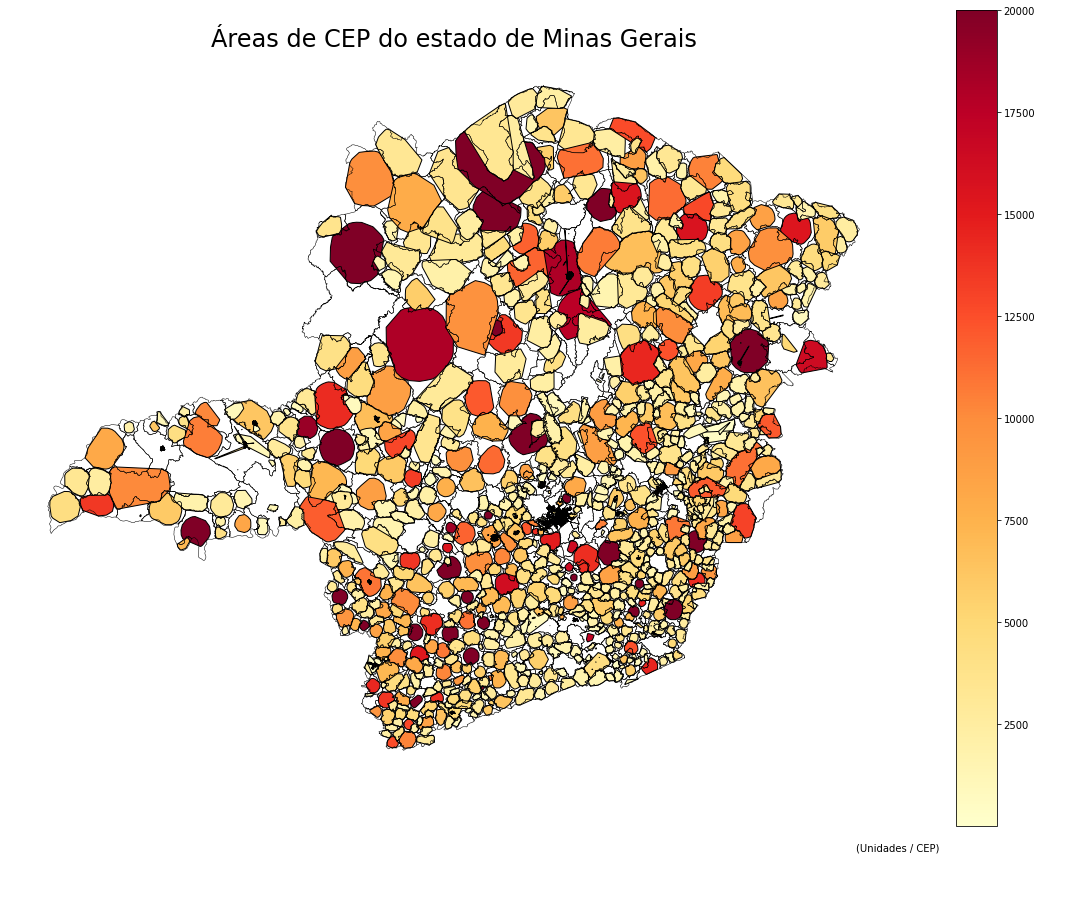

In [25]:
fig, gax = plt.subplots(figsize = (20,15))
plt.title("Áreas de CEP do estado de Minas Gerais", fontsize=24)
lim_municipal.plot(ax=gax,
                   edgecolor='black',
                   linewidth=0.5)
mg_area_cep.plot(
    ax=gax, 
    edgecolor='black', 
    column='QTD_Unidades', 
    legend=True, 
    cmap='YlOrRd',
    vmin=1, vmax=20000
    )
gax.annotate('(Unidades / CEP)',xy=(0.8, 0.06),  xycoords='figure fraction')

plt.axis('off')

#labeling the map with the cities
#for x, y, label in zip(mg_area_cep['Coordenadas'].x, mg_area_cep['Coordenadas'].y, mg_area_cep['Cidade']):
#    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

plt.show()

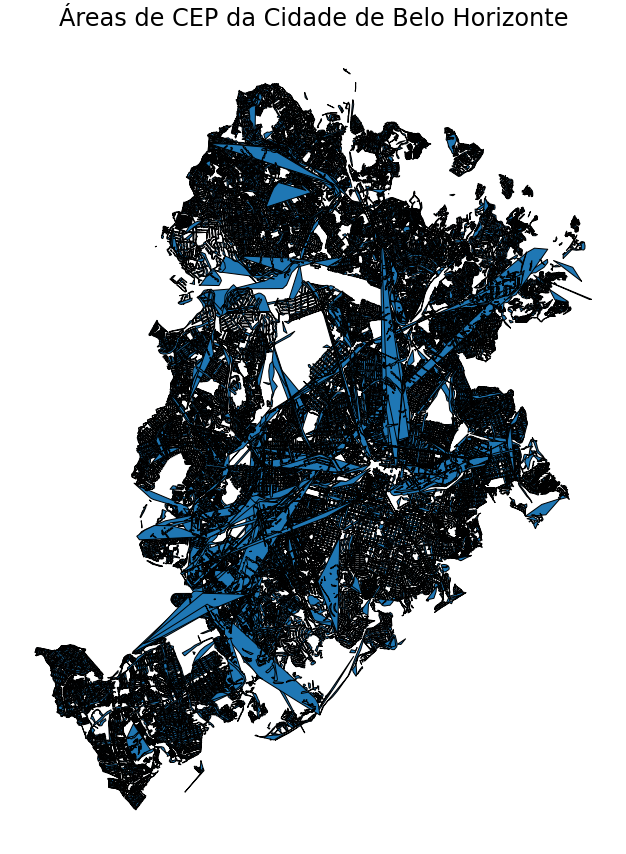

In [26]:
fig, gax = plt.subplots(figsize = (20,15))
plt.title("Áreas de CEP da Cidade de Belo Horizonte", fontsize=24)
bh_area_cep.plot(ax=gax,
                   edgecolor='black',
                   linewidth=1)
plt.axis('off')
plt.show()

## Resultados

Base de dados obtida do resultado entre a junção das estimativas de área de CEP de Belo Horizonte, suavizadas por envoltório côncavo, com o restante das áreas de CEP do Estado de Minas Gerais, baseadas em envoltório convexo.

In [27]:
bh_area_cep['Cidade'] = 'Belo Horizonte'
bh_area_cep = bh_area_cep[['CEP', 'Cidade', 'QTD_Unidades', 'geometry']]
bh_area_cep = bh_area_cep.sort_values(by = 'QTD_Unidades')
bh_area_cep.head()

,CEP,Cidade,QTD_Unidades,geometry
6943,30140-160,Belo Horizonte,3.0,"POLYGON ((-43.93588 -19.93860, -43.93600 -19.9..."
11153,31255-120,Belo Horizonte,3.0,"POLYGON ((-43.95433 -19.87509, -43.95473 -19.8..."
10332,31365-060,Belo Horizonte,4.0,"POLYGON ((-43.99735 -19.86833, -43.99743 -19.8..."
11319,30810-620,Belo Horizonte,4.0,"POLYGON ((-43.99244 -19.89259, -43.99278 -19.8..."
12545,30730-710,Belo Horizonte,4.0,"POLYGON ((-43.98598 -19.90654, -43.98605 -19.9..."


In [28]:
mg_area_cep.drop(mg_area_cep[mg_area_cep['Cidade'] >= 'Belo Horizonte'].index, inplace = True)
mg_area_cep = mg_area_cep.append(bh_area_cep)
mg_area_cep = mg_area_cep.sort_values(by = 'QTD_Unidades')
mg_area_cep.head()

,CEP,Cidade,QTD_Unidades,geometry
6943,30140-160,Belo Horizonte,3.0,"POLYGON ((-43.93588 -19.93860, -43.93600 -19.9..."
11153,31255-120,Belo Horizonte,3.0,"POLYGON ((-43.95433 -19.87509, -43.95473 -19.8..."
10332,31365-060,Belo Horizonte,4.0,"POLYGON ((-43.99735 -19.86833, -43.99743 -19.8..."
11319,30810-620,Belo Horizonte,4.0,"POLYGON ((-43.99244 -19.89259, -43.99278 -19.8..."
28243,38440-044,Araguari,4.0,"POLYGON ((-48.18310 -18.64560, -48.18392 -18.6..."


In [29]:
mg_area_cep.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15761 entries, 6943 to 14361
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CEP           15761 non-null  object  
 1   Cidade        15761 non-null  object  
 2   QTD_Unidades  7366 non-null   float64 
 3   geometry      15761 non-null  geometry
dtypes: float64(1), geometry(1), object(2)
memory usage: 615.7+ KB


In [30]:
mg_area_cep.to_csv('mg_area_cep.csv', encoding='utf-8')
files.download('mg_area_cep.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>